In [1]:
# Importing necessary libraries

!pip install cellpylib

import cellpylib as cpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor
import seaborn as sns
import time
import math
import matplotlib.cm as cm # For colourmap plots later
from tqdm import tqdm

In [2]:
# Optional. Makes the outputs more readable by surpressing certain warnings.

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [54]:
# Parameters

# Data generation parameters
data_size = 100 # the number of data points in each row of data
timesteps = 100 # the number of timesteps which each programme is run for before the output is used to train the model

# Model parameters
num_epochs = 5000  # Number of training epochs #Later move to 1000 epochs
hidden_size = 512  # Update with the desired size of the hidden layer
learning_rate = 0.005 # learning rate used later in the optimizer
batch_size = 128 # Batch size used when creating the train and test datasets. 32 is more suitable for this problem. 
epochs = np.arange(0,num_epochs, 1) # Used in plotting
accuracy_frequency = 10 # Used in the evaluation of the model #Later move to 1. moving_avg will clear up plots

In [55]:
def prog_dist_weight_hierarchicalclustering():
    
    hierarchical_clustering_order = [96, 0, 160, 32, 224, 192, 8, 136, 40, 168, 64, 128, 164, 36, 104, 6, 20, 18, 146, 5, 17, 196, 3, 48, 10, 
                                     12, 34, 68, 80, 140, 134, 148, 38, 52, 33, 108, 74, 88, 172, 228, 4, 72, 1, 2, 16, 44, 100, 144, 130, 132, 
                                     194, 66, 24, 152, 41, 97, 7, 21, 37, 26, 82, 98, 56, 200, 116, 138, 208, 163, 76, 42, 46, 112, 177, 22, 
                                     131, 145, 35, 49, 162, 176, 19, 133, 9, 65, 11, 81, 25, 67, 141, 13, 69, 197, 137, 193, 147, 143, 157, 109, 
                                     199, 213, 126, 57, 226, 129, 161, 23, 232, 184, 122, 142, 83, 27, 39, 71, 102, 99, 86, 204, 153, 180, 210, 
                                     105, 212, 15, 53, 50, 60, 85, 89, 225, 29, 149, 169, 45, 156, 106, 165, 150, 51, 120, 135, 154, 30, 75, 198,
                                     178, 179, 43, 90, 101, 170, 166, 77, 113, 195, 240, 54, 70, 73, 28, 14, 84, 87, 31, 107, 121, 181, 91, 167, 
                                     236, 185, 227, 209, 244, 139, 241, 58, 174, 205, 114, 171, 151, 62, 118, 59, 115, 186, 242, 55, 111, 94, 
                                     125, 47, 61, 103, 117, 110, 124, 93, 92, 78, 79, 248, 250, 252, 234, 254, 251, 239, 235, 255, 249, 238, 
                                     253, 218, 219, 233, 159, 215, 182, 183, 95, 119, 207, 63, 220, 206, 175, 221, 243, 187, 245, 158, 214, 155, 
                                     211, 123, 201, 173, 229, 237, 127, 216, 223, 247, 191, 202, 217, 222, 190, 203, 246, 230, 189, 188, 231]
    #programmes = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225, 249, 255] #rel_list
    programmes = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225]
    prog_list = np.zeros(256)
    for prog in programmes:
        zipf_weight = (hierarchical_clustering_order[prog] + 10)**(-1)
        prog_list[prog] = zipf_weight
    prog_list_norm = [x / sum(prog_list) for x in prog_list]
    return prog_list_norm

'''
def prog_dist_antiweight_hierarchicalclustering(): #UNCORRECTED FUNCTION
    
    hierarchical_clustering_order = [96, 0, 160, 32, 224, 192, 8, 136, 40, 168, 64, 128, 164, 36, 104, 6, 20, 18, 146, 5, 17, 196, 3, 48, 10, 
                                     12, 34, 68, 80, 140, 134, 148, 38, 52, 33, 108, 74, 88, 172, 228, 4, 72, 1, 2, 16, 44, 100, 144, 130, 132, 
                                     194, 66, 24, 152, 41, 97, 7, 21, 37, 26, 82, 98, 56, 200, 116, 138, 208, 163, 76, 42, 46, 112, 177, 22, 
                                     131, 145, 35, 49, 162, 176, 19, 133, 9, 65, 11, 81, 25, 67, 141, 13, 69, 197, 137, 193, 147, 143, 157, 109, 
                                     199, 213, 126, 57, 226, 129, 161, 23, 232, 184, 122, 142, 83, 27, 39, 71, 102, 99, 86, 204, 153, 180, 210, 
                                     105, 212, 15, 53, 50, 60, 85, 89, 225, 29, 149, 169, 45, 156, 106, 165, 150, 51, 120, 135, 154, 30, 75, 198,
                                     178, 179, 43, 90, 101, 170, 166, 77, 113, 195, 240, 54, 70, 73, 28, 14, 84, 87, 31, 107, 121, 181, 91, 167, 
                                     236, 185, 227, 209, 244, 139, 241, 58, 174, 205, 114, 171, 151, 62, 118, 59, 115, 186, 242, 55, 111, 94, 
                                     125, 47, 61, 103, 117, 110, 124, 93, 92, 78, 79, 248, 250, 252, 234, 254, 251, 239, 235, 255, 249, 238, 
                                     253, 218, 219, 233, 159, 215, 182, 183, 95, 119, 207, 63, 220, 206, 175, 221, 243, 187, 245, 158, 214, 155, 
                                     211, 123, 201, 173, 229, 237, 127, 216, 223, 247, 191, 202, 217, 222, 190, 203, 246, 230, 189, 188, 231]
    
    programmes = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225]
    prog_list = np.zeros(256)
    for prog in programmes:
        zipf_weight = (255 - hierarchical_clustering_order[prog] + 10)**(-1)
        prog_list[prog] = zipf_weight
    prog_list_norm = [x / sum(prog_list) for x in prog_list]
    return prog_list_norm
'''

def prog_dist_antiweight_hierarchicalclustering(): # Corrected version
    
    hierarchical_clustering_order = [96, 0, 160, 32, 224, 192, 8, 136, 40, 168, 64, 128, 164, 36, 104, 6, 20, 18, 146, 5, 17, 196, 3, 48, 10, 
                                     12, 34, 68, 80, 140, 134, 148, 38, 52, 33, 108, 74, 88, 172, 228, 4, 72, 1, 2, 16, 44, 100, 144, 130, 132, 
                                     194, 66, 24, 152, 41, 97, 7, 21, 37, 26, 82, 98, 56, 200, 116, 138, 208, 163, 76, 42, 46, 112, 177, 22, 
                                     131, 145, 35, 49, 162, 176, 19, 133, 9, 65, 11, 81, 25, 67, 141, 13, 69, 197, 137, 193, 147, 143, 157, 109, 
                                     199, 213, 126, 57, 226, 129, 161, 23, 232, 184, 122, 142, 83, 27, 39, 71, 102, 99, 86, 204, 153, 180, 210, 
                                     105, 212, 15, 53, 50, 60, 85, 89, 225, 29, 149, 169, 45, 156, 106, 165, 150, 51, 120, 135, 154, 30, 75, 198,
                                     178, 179, 43, 90, 101, 170, 166, 77, 113, 195, 240, 54, 70, 73, 28, 14, 84, 87, 31, 107, 121, 181, 91, 167, 
                                     236, 185, 227, 209, 244, 139, 241, 58, 174, 205, 114, 171, 151, 62, 118, 59, 115, 186, 242, 55, 111, 94, 
                                     125, 47, 61, 103, 117, 110, 124, 93, 92, 78, 79, 248, 250, 252, 234, 254, 251, 239, 235, 255, 249, 238, 
                                     253, 218, 219, 233, 159, 215, 182, 183, 95, 119, 207, 63, 220, 206, 175, 221, 243, 187, 245, 158, 214, 155, 
                                     211, 123, 201, 173, 229, 237, 127, 216, 223, 247, 191, 202, 217, 222, 190, 203, 246, 230, 189, 188, 231]
    
    programmes = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225]
    prog_list = np.zeros(256)
    for prog in programmes:
        zipf_weight = (255 - hierarchical_clustering_order.index(prog)+10)**(-1)
        prog_list[prog] = zipf_weight
    prog_list_norm = [x / sum(prog_list) for x in prog_list]
    return prog_list_norm

In [56]:
programmes_prob_distribution = prog_dist_antiweight_hierarchicalclustering()

In [57]:
# Model Initialisation / Training setup

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.bn2 = nn.BatchNorm1d(num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.bn2(out)
        return out

# Define the input size, hidden size, and number of classes
input_size = data_size  # Update with the actual input size
num_classes = 256 #Number of potential classes, here stuck at 256

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [58]:
# Define a way to reset weights

def reset_weights(model):
    for module in model.modules():
        if isinstance(module, nn.Linear):
            module.reset_parameters()

In [59]:
# Data generation functions (where the programmes_considered have a probability distribution)

def create_data(data_size, programmes_prob_distribution, number_of_samples, timesteps):

    # Creating the dataset and labels variables to be populated later
    dataset = np.empty(shape=(number_of_samples, data_size), dtype=int) # each row is data_size length, with number_of_samples rows
    labels = np.empty(shape=(1, number_of_samples), dtype=int)

    # Stating the space of considered programmes
    programmes = np.arange(0,256,1)

    # Normalising the distribution in case it is not already normalised
    programmes_total = sum(programmes_prob_distribution)
    programmes_prob_distribution_norm = [x / programmes_total for x in programmes_prob_distribution]
    
    for i in range(number_of_samples):

        # Randomly selecting a rule number according to the probability distribution given
        rule_number = np.random.choice(a = programmes, size=None, replace=True, p = programmes_prob_distribution_norm)
        #print(f"Considering rule_number = ", rule_number)
        cellular_automaton = cpl.init_random(data_size)
        cellular_automaton = cpl.evolve(cellular_automaton, timesteps=timesteps, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule_number))
        #print(cellular_automaton[-1])
        dataset[i] = cellular_automaton[-1]
        labels[:,i] = rule_number

    return [dataset, labels]

def data_loader(data_size, programmes_prob_distribution, number_of_samples, timesteps):

    # Generate the data according to input parameters
    [dataset, labels] = create_data(data_size, programmes_prob_distribution, number_of_samples, timesteps)
    labels = labels[0] # Deal with the fact that the output is a list of a single list

    # Shifting the labels such that they are indexed from 0. Required for cross entropy to work
    #labels = [x - min(labels) for x in labels] #!!! Not currently shifting labels in a test to alter them later - may help with training in smaller batches
    # Use data_split
    data = [(data_sample, label) for data_sample, label in zip(dataset, labels)]

    train_dataset, train_labels = zip(*data)
    
    tensor_train_dataset = TensorDataset(Tensor(train_dataset), Tensor(train_labels))
    
    train_loader = DataLoader(tensor_train_dataset, batch_size=batch_size, shuffle=True)

    return train_loader

In [60]:
# Evaluates a model over the space of all possible functions. Outputs a vector giving that performance

def model_evaluation(model, data_size, timesteps, batch_size):

    # State which programmes are being considered. In this case, it's all of them.
    #programmes_considered = np.arange(0,256,1) #NOTE: THIS DISABLING IS TEMPORARY. AIM TO REINTRODUCE IT
    programmes_considered = np.array([0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225, 249, 255]) # The programmes used at the moment in autocorrelation

    accuracy_vector = np.empty(256)
    
    for programme in programmes_considered:

        programmes_prob_distribution = [0]*256
        programmes_prob_distribution[programme] = 1

        train_loader = data_loader(data_size, programmes_prob_distribution, batch_size, timesteps)

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for data, labels in train_loader:
                outputs = model(data)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
            accuracy = 100 * correct / total #returns the accuracy as a percentage
            #print(f"For programme " + str(programme) + ": Accuracy = " + str(accuracy))
        accuracy_vector[programme] = accuracy
                
    return accuracy_vector

In [61]:
# Training loop (includes data generation). Note that here training and test loss cease to make much sense

def main_train(data_size, programmes_prob_distribution, batch_size, timesteps, num_epochs):

    # Initisalise training and test loss tracking variables
    training_loss = np.empty(num_epochs)

    # Initialise an array to track not only the general training and test loss, but also the accuracy on individual programme classification during training.
    # This is to attempt to see grokking.
    # Form: Each row of accuracy_array is an epoch, each column of accuracy_array is a binary 1 or 0 based on whether or not it was correctly classified. 
    #accuracy_frequency = 100 # Once every 100 epochs, the accuracy is measured
    accuracy_array = np.empty((math.floor(num_epochs/accuracy_frequency), 256))
    # Initialising variaable for tracking where in the accuracy_array to write data
    eval_count = 0
    # Each epoch here trains over 1 batch size of data (which at the moment is 32). Each epoch is therefore smaller and better controlled.
    for epoch in tqdm(range(num_epochs)):

        # Continually monitoring accuracy of the model by adjusting the accuracy_array
        if epoch%accuracy_frequency==0:
            accuracy_vector = model_evaluation(model, data_size, timesteps, batch_size)
            accuracy_array[eval_count] = accuracy_vector
            eval_count += 1
        
        train_loader = data_loader(data_size, programmes_prob_distribution, batch_size, timesteps)
        for data, labels in train_loader:
            # Forward pass
            outputs = model(data)
    
            #Shifting labels for loss calculation
            shifted_labels = labels - torch.min(labels)
            shifted_labels = shifted_labels.long()
            loss = criterion(outputs, shifted_labels)
                
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Print the loss after each epoch
        if epoch%100==0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
        training_loss[epoch] = loss.item()

    return [training_loss, accuracy_array]

  0%|          | 1/5000 [00:25<35:59:51, 25.92s/it]

Epoch [1/5000], Loss: 5.625960826873779


  2%|▏         | 101/5000 [06:55<11:57:36,  8.79s/it]

Epoch [101/5000], Loss: 2.977200508117676


  4%|▍         | 201/5000 [13:59<11:37:06,  8.72s/it]

Epoch [201/5000], Loss: 2.5980656147003174


  6%|▌         | 301/5000 [20:24<10:55:09,  8.37s/it]

Epoch [301/5000], Loss: 2.5980589389801025


  8%|▊         | 401/5000 [27:03<11:22:59,  8.91s/it]

Epoch [401/5000], Loss: 2.2357137203216553


 10%|█         | 501/5000 [33:41<13:33:17, 10.85s/it]

Epoch [501/5000], Loss: 2.136699914932251


 12%|█▏        | 601/5000 [40:44<11:28:47,  9.39s/it]

Epoch [601/5000], Loss: 2.3971240520477295


 14%|█▍        | 701/5000 [47:43<13:41:00, 11.46s/it]

Epoch [701/5000], Loss: 2.301055669784546


 16%|█▌        | 801/5000 [54:45<11:28:39,  9.84s/it]

Epoch [801/5000], Loss: 2.1632871627807617


 18%|█▊        | 901/5000 [1:01:32<9:38:17,  8.46s/it]

Epoch [901/5000], Loss: 2.0063223838806152


 20%|██        | 1001/5000 [1:07:55<9:19:03,  8.39s/it]

Epoch [1001/5000], Loss: 1.9392831325531006


 22%|██▏       | 1101/5000 [1:14:16<8:59:37,  8.30s/it]

Epoch [1101/5000], Loss: 2.1330840587615967


 24%|██▍       | 1201/5000 [1:20:37<8:48:47,  8.35s/it]

Epoch [1201/5000], Loss: 2.3376057147979736


 26%|██▌       | 1301/5000 [1:27:02<9:04:53,  8.84s/it]

Epoch [1301/5000], Loss: 2.035595655441284


 28%|██▊       | 1401/5000 [1:33:57<8:31:19,  8.52s/it] 

Epoch [1401/5000], Loss: 2.055164098739624


 30%|███       | 1501/5000 [1:40:22<8:09:55,  8.40s/it]

Epoch [1501/5000], Loss: 2.1153056621551514


 32%|███▏      | 1601/5000 [1:46:57<8:08:22,  8.62s/it] 

Epoch [1601/5000], Loss: 1.9049264192581177


 34%|███▍      | 1701/5000 [1:54:07<7:42:04,  8.40s/it] 

Epoch [1701/5000], Loss: 1.8349640369415283


 36%|███▌      | 1801/5000 [2:00:45<7:51:31,  8.84s/it]

Epoch [1801/5000], Loss: 2.058900833129883


 38%|███▊      | 1901/5000 [2:07:11<7:22:04,  8.56s/it]

Epoch [1901/5000], Loss: 1.9017002582550049


 40%|████      | 2001/5000 [2:13:38<6:58:31,  8.37s/it]

Epoch [2001/5000], Loss: 1.989959478378296


 42%|████▏     | 2101/5000 [2:20:07<6:42:44,  8.34s/it]

Epoch [2101/5000], Loss: 1.90777587890625


 44%|████▍     | 2201/5000 [2:27:23<6:39:25,  8.56s/it]

Epoch [2201/5000], Loss: 1.8722131252288818


 46%|████▌     | 2301/5000 [2:33:52<6:25:08,  8.56s/it]

Epoch [2301/5000], Loss: 1.7400017976760864


 48%|████▊     | 2401/5000 [2:40:18<6:06:38,  8.46s/it]

Epoch [2401/5000], Loss: 1.74614679813385


 50%|█████     | 2501/5000 [2:46:47<5:57:07,  8.57s/it]

Epoch [2501/5000], Loss: 1.809997320175171


 52%|█████▏    | 2601/5000 [2:53:15<5:38:14,  8.46s/it]

Epoch [2601/5000], Loss: 1.717565655708313


 54%|█████▍    | 2701/5000 [2:59:44<5:33:50,  8.71s/it]

Epoch [2701/5000], Loss: 1.6361738443374634


 56%|█████▌    | 2801/5000 [3:06:09<5:25:25,  8.88s/it]

Epoch [2801/5000], Loss: 1.6396756172180176


 58%|█████▊    | 2901/5000 [3:12:33<4:59:33,  8.56s/it]

Epoch [2901/5000], Loss: 1.6524920463562012


 60%|██████    | 3001/5000 [3:19:06<4:37:47,  8.34s/it]

Epoch [3001/5000], Loss: 1.5351078510284424


 62%|██████▏   | 3101/5000 [3:25:30<4:26:32,  8.42s/it]

Epoch [3101/5000], Loss: 1.462725043296814


 64%|██████▍   | 3201/5000 [3:31:54<4:12:04,  8.41s/it]

Epoch [3201/5000], Loss: 1.5746188163757324


 66%|██████▌   | 3301/5000 [3:38:24<4:11:04,  8.87s/it]

Epoch [3301/5000], Loss: 1.4207712411880493


 68%|██████▊   | 3401/5000 [3:46:01<3:50:03,  8.63s/it]

Epoch [3401/5000], Loss: 1.4345811605453491


 70%|███████   | 3501/5000 [3:52:44<3:34:50,  8.60s/it]

Epoch [3501/5000], Loss: 1.4067662954330444


 72%|███████▏  | 3601/5000 [3:59:36<3:39:05,  9.40s/it]

Epoch [3601/5000], Loss: 1.404508113861084


 74%|███████▍  | 3701/5000 [4:06:11<3:07:15,  8.65s/it]

Epoch [3701/5000], Loss: 1.3648858070373535


 76%|███████▌  | 3801/5000 [4:12:52<2:51:26,  8.58s/it]

Epoch [3801/5000], Loss: 1.3915218114852905


 78%|███████▊  | 3901/5000 [4:19:34<2:38:46,  8.67s/it]

Epoch [3901/5000], Loss: 1.416567087173462


 80%|████████  | 4001/5000 [4:26:34<2:19:00,  8.35s/it]

Epoch [4001/5000], Loss: 1.3390828371047974


 82%|████████▏ | 4101/5000 [4:33:13<2:12:10,  8.82s/it]

Epoch [4101/5000], Loss: 1.4040799140930176


 84%|████████▍ | 4201/5000 [4:40:02<1:57:52,  8.85s/it]

Epoch [4201/5000], Loss: 1.3815398216247559


 86%|████████▌ | 4301/5000 [4:46:31<1:39:51,  8.57s/it]

Epoch [4301/5000], Loss: 1.314537763595581


 88%|████████▊ | 4401/5000 [4:53:50<1:50:27, 11.06s/it]

Epoch [4401/5000], Loss: 1.3344643115997314


 90%|█████████ | 4501/5000 [5:01:25<1:11:51,  8.64s/it]

Epoch [4501/5000], Loss: 1.2915807962417603


 92%|█████████▏| 4601/5000 [5:08:24<1:11:22, 10.73s/it]

Epoch [4601/5000], Loss: 1.2260119915008545


 94%|█████████▍| 4701/5000 [5:15:12<44:10,  8.87s/it]  

Epoch [4701/5000], Loss: 1.2028506994247437


 96%|█████████▌| 4801/5000 [5:21:36<28:07,  8.48s/it]

Epoch [4801/5000], Loss: 1.2494972944259644


 98%|█████████▊| 4901/5000 [5:28:41<14:00,  8.49s/it]

Epoch [4901/5000], Loss: 1.1851335763931274


100%|██████████| 5000/5000 [5:34:52<00:00,  4.02s/it]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\68998292.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps
  0%|          | 1/5000 [00:23<33:06:08, 23.84s/it]

Epoch [1/5000], Loss: 5.898806571960449


  2%|▏         | 101/5000 [06:47<11:29:59,  8.45s/it]

Epoch [101/5000], Loss: 2.6334035396575928


  4%|▍         | 201/5000 [13:09<11:15:06,  8.44s/it]

Epoch [201/5000], Loss: 2.325404644012451


  6%|▌         | 301/5000 [19:32<11:34:21,  8.87s/it]

Epoch [301/5000], Loss: 2.0568180084228516


  8%|▊         | 401/5000 [25:54<10:54:47,  8.54s/it]

Epoch [401/5000], Loss: 2.064918279647827


 10%|█         | 501/5000 [32:13<10:31:41,  8.42s/it]

Epoch [501/5000], Loss: 1.9338204860687256


 12%|█▏        | 601/5000 [38:51<10:16:36,  8.41s/it]

Epoch [601/5000], Loss: 9.996026992797852


 14%|█▍        | 701/5000 [46:36<10:42:36,  8.97s/it]

Epoch [701/5000], Loss: 10.023575782775879


 16%|█▌        | 801/5000 [53:13<10:45:50,  9.23s/it]

Epoch [801/5000], Loss: 1.893965244293213


 18%|█▊        | 901/5000 [59:38<9:39:56,  8.49s/it] 

Epoch [901/5000], Loss: 1.8182986974716187


 20%|██        | 1001/5000 [1:06:13<9:23:19,  8.45s/it]

Epoch [1001/5000], Loss: 1.6492706537246704


 22%|██▏       | 1101/5000 [1:12:50<9:30:31,  8.78s/it] 

Epoch [1101/5000], Loss: 1.7449790239334106


 24%|██▍       | 1201/5000 [1:19:57<9:11:52,  8.72s/it] 

Epoch [1201/5000], Loss: 1.6335283517837524


 26%|██▌       | 1301/5000 [1:26:36<8:35:31,  8.36s/it] 

Epoch [1301/5000], Loss: 1.648258090019226


 28%|██▊       | 1401/5000 [1:32:59<8:28:33,  8.48s/it]

Epoch [1401/5000], Loss: 1.5417574644088745


 30%|███       | 1501/5000 [1:39:21<8:11:06,  8.42s/it]

Epoch [1501/5000], Loss: 1.4861421585083008


 32%|███▏      | 1601/5000 [1:45:46<7:53:55,  8.37s/it]

Epoch [1601/5000], Loss: 1.5766266584396362


 34%|███▍      | 1701/5000 [1:52:23<8:36:27,  9.39s/it]

Epoch [1701/5000], Loss: 1.4580509662628174


 36%|███▌      | 1801/5000 [1:59:14<8:09:58,  9.19s/it]

Epoch [1801/5000], Loss: 1.470234990119934


 38%|███▊      | 1901/5000 [2:06:41<7:47:15,  9.05s/it] 

Epoch [1901/5000], Loss: 1.33946692943573


 40%|████      | 2001/5000 [2:13:50<9:27:01, 11.34s/it]

Epoch [2001/5000], Loss: 1.3678920269012451


 42%|████▏     | 2101/5000 [2:20:49<7:12:40,  8.96s/it]

Epoch [2101/5000], Loss: 6.684566974639893


 44%|████▍     | 2201/5000 [2:27:16<6:35:14,  8.47s/it]

Epoch [2201/5000], Loss: 1.4107009172439575


 46%|████▌     | 2301/5000 [2:33:38<6:19:18,  8.43s/it]

Epoch [2301/5000], Loss: 1.333211064338684


 48%|████▊     | 2401/5000 [2:40:01<6:02:57,  8.38s/it]

Epoch [2401/5000], Loss: 1.3849356174468994


 50%|█████     | 2501/5000 [2:46:22<5:43:34,  8.25s/it]

Epoch [2501/5000], Loss: 1.2960107326507568


 52%|█████▏    | 2601/5000 [2:52:44<5:36:45,  8.42s/it]

Epoch [2601/5000], Loss: 1.3254613876342773


 54%|█████▍    | 2701/5000 [2:59:03<5:26:05,  8.51s/it]

Epoch [2701/5000], Loss: 1.3425167798995972


 56%|█████▌    | 2801/5000 [3:05:27<5:08:45,  8.42s/it]

Epoch [2801/5000], Loss: 1.227769136428833


 58%|█████▊    | 2901/5000 [3:11:48<4:56:07,  8.46s/it]

Epoch [2901/5000], Loss: 1.3027331829071045


 60%|██████    | 3001/5000 [3:18:07<4:41:53,  8.46s/it]

Epoch [3001/5000], Loss: 1.294937014579773


 62%|██████▏   | 3101/5000 [3:24:44<6:29:42, 12.31s/it]

Epoch [3101/5000], Loss: 1.23625648021698


 64%|██████▍   | 3201/5000 [3:31:54<4:50:11,  9.68s/it]

Epoch [3201/5000], Loss: 1.2274348735809326


 66%|██████▌   | 3301/5000 [3:39:58<4:13:10,  8.94s/it]

Epoch [3301/5000], Loss: 1.2616546154022217


 68%|██████▊   | 3401/5000 [3:46:58<4:12:58,  9.49s/it]

Epoch [3401/5000], Loss: 1.1883386373519897


 70%|███████   | 3501/5000 [3:54:23<3:41:55,  8.88s/it]

Epoch [3501/5000], Loss: 1.219232439994812


 72%|███████▏  | 3601/5000 [4:00:54<3:22:07,  8.67s/it]

Epoch [3601/5000], Loss: 1.2677737474441528


 74%|███████▍  | 3701/5000 [4:39:22<3:04:29,  8.52s/it]   

Epoch [3701/5000], Loss: 1.2519843578338623


 76%|███████▌  | 3801/5000 [4:45:51<2:47:54,  8.40s/it]

Epoch [3801/5000], Loss: 1.172450065612793


 78%|███████▊  | 3901/5000 [4:52:14<2:36:22,  8.54s/it]

Epoch [3901/5000], Loss: 1.2375009059906006


 80%|████████  | 4001/5000 [4:58:37<2:19:40,  8.39s/it]

Epoch [4001/5000], Loss: 1.1689331531524658


 82%|████████▏ | 4101/5000 [5:04:59<2:06:12,  8.42s/it]

Epoch [4101/5000], Loss: 1.1655609607696533


 84%|████████▍ | 4201/5000 [5:11:20<1:52:01,  8.41s/it]

Epoch [4201/5000], Loss: 1.3025176525115967


 86%|████████▌ | 4301/5000 [5:17:40<1:38:37,  8.47s/it]

Epoch [4301/5000], Loss: 1.1202012300491333


 88%|████████▊ | 4401/5000 [5:24:02<1:24:11,  8.43s/it]

Epoch [4401/5000], Loss: 1.220180869102478


 90%|█████████ | 4501/5000 [5:31:20<1:14:08,  8.92s/it]

Epoch [4501/5000], Loss: 1.1590567827224731


 92%|█████████▏| 4601/5000 [5:38:10<59:31,  8.95s/it]  

Epoch [4601/5000], Loss: 1.1153781414031982


 94%|█████████▍| 4701/5000 [5:45:10<43:08,  8.66s/it]

Epoch [4701/5000], Loss: 1.2248860597610474


 96%|█████████▌| 4801/5000 [5:51:57<32:38,  9.84s/it]

Epoch [4801/5000], Loss: 1.1778138875961304


 98%|█████████▊| 4901/5000 [5:59:14<14:03,  8.52s/it]

Epoch [4901/5000], Loss: 1.2105942964553833


100%|██████████| 5000/5000 [6:05:20<00:00,  4.38s/it]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\68998292.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps
  0%|          | 1/5000 [00:24<34:01:27, 24.50s/it]

Epoch [1/5000], Loss: 5.739803791046143


  2%|▏         | 101/5000 [06:49<11:27:33,  8.42s/it]

Epoch [101/5000], Loss: 2.4802603721618652


  4%|▍         | 201/5000 [13:37<12:13:55,  9.18s/it]

Epoch [201/5000], Loss: 2.0368406772613525


  6%|▌         | 301/5000 [22:18<14:36:37, 11.19s/it]

Epoch [301/5000], Loss: 1.9280964136123657


  8%|▊         | 401/5000 [31:19<15:17:40, 11.97s/it]

Epoch [401/5000], Loss: 1.826507806777954


 10%|█         | 501/5000 [40:20<15:04:22, 12.06s/it]

Epoch [501/5000], Loss: 1.7563992738723755


 12%|█▏        | 601/5000 [49:10<14:16:17, 11.68s/it]

Epoch [601/5000], Loss: 1.7035852670669556


 14%|█▍        | 701/5000 [58:11<20:51:49, 17.47s/it]

Epoch [701/5000], Loss: 1.697913408279419


 16%|█▌        | 801/5000 [1:08:27<20:16:21, 17.38s/it]

Epoch [801/5000], Loss: 1.5782259702682495


 18%|█▊        | 901/5000 [1:21:04<16:57:23, 14.89s/it]

Epoch [901/5000], Loss: 1.5869256258010864


 20%|██        | 1001/5000 [1:30:54<13:25:57, 12.09s/it]

Epoch [1001/5000], Loss: 1.495415449142456


 22%|██▏       | 1101/5000 [1:39:59<9:16:48,  8.57s/it] 

Epoch [1101/5000], Loss: 1.4687180519104004


 24%|██▍       | 1201/5000 [1:46:31<9:03:08,  8.58s/it]

Epoch [1201/5000], Loss: 1.5224319696426392


 26%|██▌       | 1301/5000 [1:52:57<8:55:21,  8.68s/it]

Epoch [1301/5000], Loss: 8.050406455993652


 28%|██▊       | 1401/5000 [1:59:25<8:48:51,  8.82s/it]

Epoch [1401/5000], Loss: 1.433194875717163


 30%|███       | 1501/5000 [2:05:52<8:11:20,  8.43s/it]

Epoch [1501/5000], Loss: 1.420859694480896


 32%|███▏      | 1601/5000 [2:12:17<7:58:47,  8.45s/it]

Epoch [1601/5000], Loss: 1.326592206954956


 34%|███▍      | 1701/5000 [2:18:48<7:45:03,  8.46s/it]

Epoch [1701/5000], Loss: 1.3685978651046753


 36%|███▌      | 1801/5000 [2:25:14<7:32:53,  8.49s/it]

Epoch [1801/5000], Loss: 1.3607170581817627


 38%|███▊      | 1901/5000 [2:31:37<7:19:48,  8.52s/it]

Epoch [1901/5000], Loss: 1.2899863719940186


 40%|████      | 2001/5000 [2:38:04<7:05:51,  8.52s/it]

Epoch [2001/5000], Loss: 1.2681052684783936


 42%|████▏     | 2101/5000 [2:44:28<6:56:30,  8.62s/it]

Epoch [2101/5000], Loss: 1.3120546340942383


 44%|████▍     | 2201/5000 [2:50:55<6:34:10,  8.45s/it]

Epoch [2201/5000], Loss: 1.2788091897964478


 46%|████▌     | 2301/5000 [2:57:19<6:20:41,  8.46s/it]

Epoch [2301/5000], Loss: 1.3068764209747314


 48%|████▊     | 2401/5000 [3:03:43<6:04:57,  8.43s/it]

Epoch [2401/5000], Loss: 1.2343668937683105


 50%|█████     | 2501/5000 [3:10:08<5:48:17,  8.36s/it]

Epoch [2501/5000], Loss: 1.2644461393356323


 52%|█████▏    | 2601/5000 [3:16:32<5:37:49,  8.45s/it]

Epoch [2601/5000], Loss: 1.3049705028533936


 54%|█████▍    | 2701/5000 [3:22:59<5:31:36,  8.65s/it]

Epoch [2701/5000], Loss: 7.382916450500488


 56%|█████▌    | 2801/5000 [3:29:23<5:12:06,  8.52s/it]

Epoch [2801/5000], Loss: 1.215114951133728


 58%|█████▊    | 2901/5000 [3:35:48<5:09:28,  8.85s/it]

Epoch [2901/5000], Loss: 1.2285362482070923


 60%|██████    | 3001/5000 [3:42:10<4:42:01,  8.47s/it]

Epoch [3001/5000], Loss: 1.2556841373443604


 62%|██████▏   | 3101/5000 [3:48:34<4:25:36,  8.39s/it]

Epoch [3101/5000], Loss: 1.1860536336898804


 64%|██████▍   | 3201/5000 [3:54:59<4:10:35,  8.36s/it]

Epoch [3201/5000], Loss: 1.199010968208313


 66%|██████▌   | 3301/5000 [4:01:25<4:00:23,  8.49s/it]

Epoch [3301/5000], Loss: 1.1987651586532593


 68%|██████▊   | 3401/5000 [4:07:50<3:46:13,  8.49s/it]

Epoch [3401/5000], Loss: 1.1937057971954346


 70%|███████   | 3501/5000 [4:14:14<3:33:21,  8.54s/it]

Epoch [3501/5000], Loss: 1.100172758102417


 72%|███████▏  | 3601/5000 [4:20:41<3:18:12,  8.50s/it]

Epoch [3601/5000], Loss: 1.1425018310546875


 74%|███████▍  | 3701/5000 [4:27:08<3:04:29,  8.52s/it]

Epoch [3701/5000], Loss: 1.0831364393234253


 76%|███████▌  | 3801/5000 [4:33:33<2:49:55,  8.50s/it]

Epoch [3801/5000], Loss: 1.13455069065094


 78%|███████▊  | 3901/5000 [4:39:58<2:36:03,  8.52s/it]

Epoch [3901/5000], Loss: 1.1571969985961914


 80%|████████  | 4001/5000 [4:46:22<2:20:57,  8.47s/it]

Epoch [4001/5000], Loss: 1.0993098020553589


 82%|████████▏ | 4101/5000 [4:52:47<2:10:45,  8.73s/it]

Epoch [4101/5000], Loss: 1.137770414352417


 84%|████████▍ | 4201/5000 [4:59:13<1:53:03,  8.49s/it]

Epoch [4201/5000], Loss: 1.0726362466812134


 86%|████████▌ | 4301/5000 [5:05:37<1:38:05,  8.42s/it]

Epoch [4301/5000], Loss: 1.060784101486206


 88%|████████▊ | 4401/5000 [5:12:01<1:23:50,  8.40s/it]

Epoch [4401/5000], Loss: 1.0324387550354004


 90%|█████████ | 4501/5000 [5:18:29<1:10:17,  8.45s/it]

Epoch [4501/5000], Loss: 1.1085456609725952


 92%|█████████▏| 4601/5000 [5:24:55<56:33,  8.50s/it]  

Epoch [4601/5000], Loss: 1.0505249500274658


 94%|█████████▍| 4701/5000 [5:31:18<42:24,  8.51s/it]

Epoch [4701/5000], Loss: 1.1233493089675903


 96%|█████████▌| 4801/5000 [5:37:44<28:18,  8.54s/it]

Epoch [4801/5000], Loss: 1.153626561164856


 98%|█████████▊| 4901/5000 [5:44:10<13:58,  8.47s/it]

Epoch [4901/5000], Loss: 1.0756285190582275


100%|██████████| 5000/5000 [5:50:10<00:00,  4.20s/it]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\68998292.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps
  0%|          | 1/5000 [00:24<33:44:10, 24.30s/it]

Epoch [1/5000], Loss: 5.338479995727539


  2%|▏         | 101/5000 [06:52<11:53:35,  8.74s/it]

Epoch [101/5000], Loss: 7.512234687805176


  4%|▍         | 201/5000 [13:17<11:12:05,  8.40s/it]

Epoch [201/5000], Loss: 2.004077196121216


  6%|▌         | 301/5000 [19:42<11:01:21,  8.44s/it]

Epoch [301/5000], Loss: 1.7828608751296997


  8%|▊         | 401/5000 [26:11<10:54:48,  8.54s/it]

Epoch [401/5000], Loss: 1.6886221170425415


 10%|█         | 501/5000 [32:37<10:56:32,  8.76s/it]

Epoch [501/5000], Loss: 1.6617321968078613


 12%|█▏        | 601/5000 [39:01<10:30:27,  8.60s/it]

Epoch [601/5000], Loss: 1.6018247604370117


 14%|█▍        | 701/5000 [45:26<10:09:09,  8.50s/it]

Epoch [701/5000], Loss: 1.4835834503173828


 16%|█▌        | 801/5000 [51:53<9:57:21,  8.54s/it] 

Epoch [801/5000], Loss: 1.5056253671646118


 18%|█▊        | 901/5000 [58:18<9:47:53,  8.61s/it]

Epoch [901/5000], Loss: 1.4111735820770264


 20%|██        | 1001/5000 [1:04:43<9:25:43,  8.49s/it]

Epoch [1001/5000], Loss: 1.3410457372665405


 22%|██▏       | 1101/5000 [1:11:08<9:13:30,  8.52s/it]

Epoch [1101/5000], Loss: 1.386440396308899


 24%|██▍       | 1201/5000 [1:17:34<8:59:37,  8.52s/it]

Epoch [1201/5000], Loss: 1.3857221603393555


 26%|██▌       | 1301/5000 [1:24:01<9:02:55,  8.81s/it]

Epoch [1301/5000], Loss: 1.3447189331054688


 28%|██▊       | 1401/5000 [1:30:24<8:25:01,  8.42s/it]

Epoch [1401/5000], Loss: 1.3433656692504883


 30%|███       | 1501/5000 [1:36:50<8:07:47,  8.36s/it]

Epoch [1501/5000], Loss: 1.28575599193573


 32%|███▏      | 1601/5000 [1:43:14<7:53:59,  8.37s/it]

Epoch [1601/5000], Loss: 1.287524938583374


 34%|███▍      | 1701/5000 [1:49:39<7:43:24,  8.43s/it]

Epoch [1701/5000], Loss: 1.327634334564209


 36%|███▌      | 1801/5000 [1:56:04<7:31:07,  8.46s/it]

Epoch [1801/5000], Loss: 1.2306606769561768


 38%|███▊      | 1901/5000 [2:02:30<7:42:44,  8.96s/it]

Epoch [1901/5000], Loss: 1.3033746480941772


 40%|████      | 2001/5000 [2:08:55<7:06:50,  8.54s/it]

Epoch [2001/5000], Loss: 1.2070198059082031


 42%|████▏     | 2101/5000 [2:16:50<8:45:02, 10.87s/it]

Epoch [2101/5000], Loss: 1.244598388671875


 44%|████▍     | 2201/5000 [2:24:08<6:48:14,  8.75s/it]

Epoch [2201/5000], Loss: 1.2570250034332275


 46%|████▌     | 2301/5000 [2:30:34<6:24:02,  8.54s/it]

Epoch [2301/5000], Loss: 1.2425079345703125


 48%|████▊     | 2401/5000 [2:37:00<6:05:17,  8.43s/it]

Epoch [2401/5000], Loss: 1.2669713497161865


 50%|█████     | 2501/5000 [2:43:24<5:53:34,  8.49s/it]

Epoch [2501/5000], Loss: 1.2428392171859741


 52%|█████▏    | 2601/5000 [2:49:49<5:40:26,  8.51s/it]

Epoch [2601/5000], Loss: 1.1575833559036255


 54%|█████▍    | 2701/5000 [2:56:12<5:25:30,  8.50s/it]

Epoch [2701/5000], Loss: 1.2236348390579224


 56%|█████▌    | 2801/5000 [3:02:35<5:18:52,  8.70s/it]

Epoch [2801/5000], Loss: 7.7643513679504395


 58%|█████▊    | 2901/5000 [3:09:11<5:31:51,  9.49s/it]

Epoch [2901/5000], Loss: 1.106202483177185


 60%|██████    | 3001/5000 [3:15:38<4:44:37,  8.54s/it]

Epoch [3001/5000], Loss: 1.113808512687683


 62%|██████▏   | 3101/5000 [3:22:04<4:32:08,  8.60s/it]

Epoch [3101/5000], Loss: 1.1281174421310425


 64%|██████▍   | 3201/5000 [3:28:30<4:14:02,  8.47s/it]

Epoch [3201/5000], Loss: 1.0415457487106323


 66%|██████▌   | 3301/5000 [3:34:55<4:00:58,  8.51s/it]

Epoch [3301/5000], Loss: 1.1539182662963867


 68%|██████▊   | 3401/5000 [3:41:18<3:45:15,  8.45s/it]

Epoch [3401/5000], Loss: 1.1679391860961914


 70%|███████   | 3501/5000 [3:47:53<3:34:42,  8.59s/it]

Epoch [3501/5000], Loss: 1.1504237651824951


 72%|███████▏  | 3601/5000 [3:54:19<3:20:58,  8.62s/it]

Epoch [3601/5000], Loss: 1.1046391725540161


 74%|███████▍  | 3701/5000 [4:00:42<3:03:25,  8.47s/it]

Epoch [3701/5000], Loss: 1.0739539861679077


 76%|███████▌  | 3801/5000 [4:07:07<2:53:53,  8.70s/it]

Epoch [3801/5000], Loss: 1.1172391176223755


 78%|███████▊  | 3901/5000 [4:13:32<2:37:09,  8.58s/it]

Epoch [3901/5000], Loss: 1.0172630548477173


 80%|████████  | 4001/5000 [4:19:58<2:21:14,  8.48s/it]

Epoch [4001/5000], Loss: 1.2388064861297607


 82%|████████▏ | 4101/5000 [4:26:21<2:05:56,  8.40s/it]

Epoch [4101/5000], Loss: 1.0849134922027588


 84%|████████▍ | 4201/5000 [4:32:54<1:55:58,  8.71s/it]

Epoch [4201/5000], Loss: 1.097167730331421


 86%|████████▌ | 4301/5000 [4:39:26<1:40:33,  8.63s/it]

Epoch [4301/5000], Loss: 1.03791081905365


 88%|████████▊ | 4401/5000 [4:45:51<1:24:14,  8.44s/it]

Epoch [4401/5000], Loss: 1.0543066263198853


 90%|█████████ | 4501/5000 [6:01:23<1:16:18,  9.18s/it]    

Epoch [4501/5000], Loss: 1.0195425748825073


 92%|█████████▏| 4601/5000 [6:08:11<1:01:28,  9.24s/it]

Epoch [4601/5000], Loss: 1.0823277235031128


 94%|█████████▍| 4701/5000 [6:16:39<52:18, 10.50s/it]  

Epoch [4701/5000], Loss: 1.0164521932601929


 96%|█████████▌| 4801/5000 [6:24:11<30:43,  9.27s/it]

Epoch [4801/5000], Loss: 0.9892358779907227


 98%|█████████▊| 4901/5000 [6:31:28<14:55,  9.04s/it]

Epoch [4901/5000], Loss: 1.0342735052108765


100%|██████████| 5000/5000 [6:38:17<00:00,  4.78s/it]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\68998292.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps
100%|██████████| 12/12 [00:00<00:00, 26.51it/s]


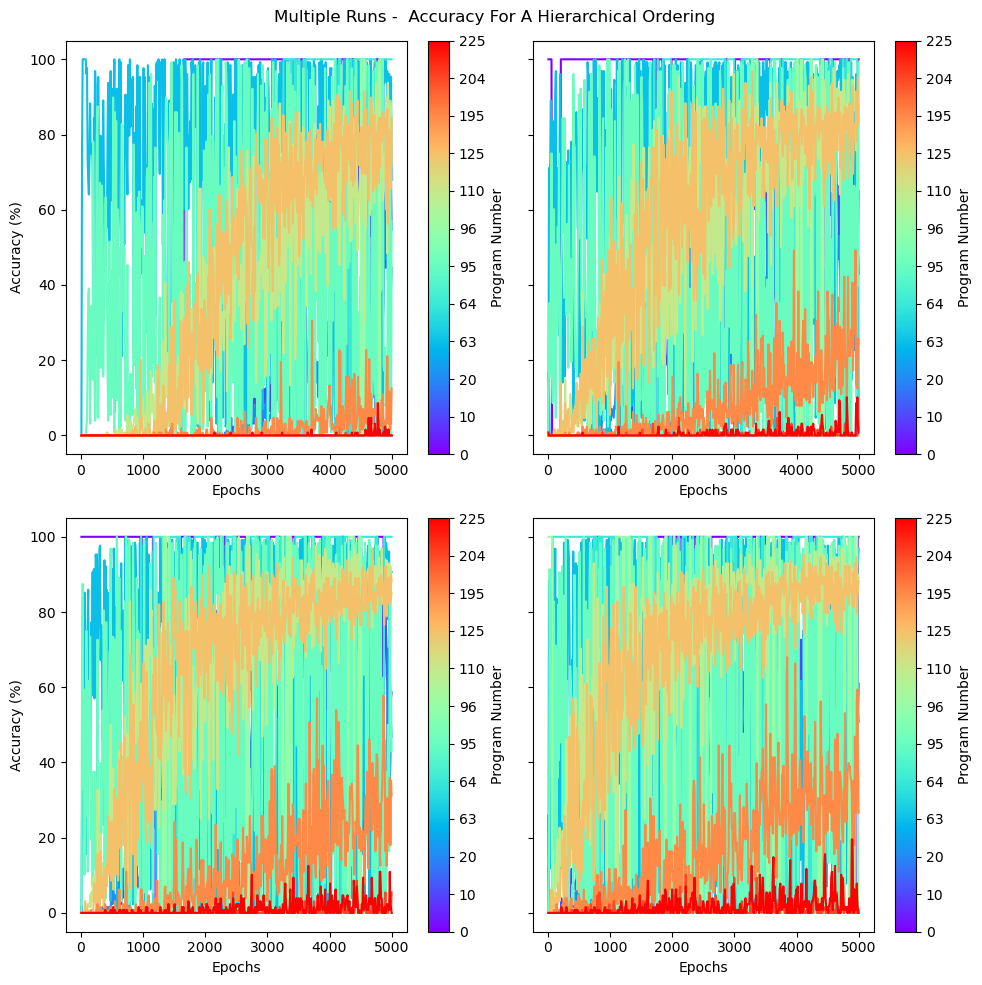

In [62]:
# Creating subplots for different runs

def accuracy_plot(ax, moving_avg, num_epochs, rel_list, repeat_idx, accuracy_array):
        
    epochs = np.arange(1, num_epochs - num_epochs%moving_avg + 1,1)

    rel_array = np.array(rel_list)
    #lines_plotted = uncorr_array[0:3]
    #lines_plotted = rel_array[2: 5]
    uncorr_array = rel_array
    lines_plotted = rel_array

    rel_epochs = [x for x, index in enumerate(epochs) if index%accuracy_frequency==0]

    # Create an axis object for the line plot
    cmap = cm.get_cmap('rainbow')  # You can choose different colormaps

    # Taking values from nearby epochs and averaging
    reshaped_epochs = np.reshape(rel_epochs, (-1, moving_avg))
    filtered_epochs = reshaped_epochs[:,0]
    repeated_filtered_epochs = np.repeat(filtered_epochs, moving_avg)

    for i in tqdm(lines_plotted):
        line = accuracy_array[:,i]
        #color = cmap(lines_plotted[np.where(lines_plotted==i)[0][0]] / (len(lines_plotted) - 1))
        #color = cmap(index / (len(lines_plotted) - 1))
        color = cmap(np.where(lines_plotted == i)[0][0] / (len(lines_plotted) - 1))
        reshaped_line = np.reshape(line, (-1, moving_avg))
        programme_label = 'Programme: ' + str(uncorr_array[np.where(lines_plotted==i)][0])
        pandas_df = pd.DataFrame({programme_label: reshaped_line.flatten(), 'Epochs': repeated_filtered_epochs})
        pandas_df_melted = pd.melt(pandas_df, id_vars = 'Epochs', value_vars = [programme_label], var_name='line', value_name = 'Values')
        #fig, ax = plt.subplots()
        sns.lineplot(data=pandas_df_melted, x='Epochs', y='Values', hue='line', ax=ax, palette = [color])

    # Create a ScalarMappable object for the colorbar
    norm = plt.Normalize(0, len(lines_plotted) - 1)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])  # Set an empty array to associate with the colorbar
    cbar = plt.colorbar(sm, ax=ax)

    cbar.set_label('Program Number')

    num_ticks = len(lines_plotted)  # Number of desired ticks
    indices = np.linspace(0, len(lines_plotted) - 1, num_ticks, dtype=int)
    tick_positions = indices
    tick_labels = lines_plotted[indices]

    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels(tick_labels)

    ax.get_legend().remove()

    ax.set_ylabel('Accuracy (%)')
    
    
#rel_list = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225, 249, 255]
rel_list = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225]
num_repeats = 4 # Must be even, sorry
moving_avg = 1
fig, axs = plt.subplots(2, int(num_repeats/2), figsize=(5*(int(num_repeats/2)),5*(int(num_repeats/2))), sharey='row')
training_loss_list = []
accuracy_array_list = []
for repeat_idx in range(num_repeats):
    reset_weights(model)
    [training_loss, accuracy_array] = main_train(data_size, programmes_prob_distribution, batch_size, timesteps, num_epochs)
    training_loss_list.append(training_loss)
    accuracy_array_list.append(accuracy_array)
    accuracy_plot(axs[repeat_idx // (num_repeats//2), repeat_idx % (num_repeats//2)], moving_avg, num_epochs, rel_list, repeat_idx, accuracy_array)
    
plt.suptitle('Multiple Runs -  Accuracy For A Hierarchical Ordering')
plt.tight_layout()
plt.show()  

In [63]:
# Pickle the results of the above calculation to avoid unneccesary corruption

import pickle

# Save training_loss_list to a file
with open('training_loss_list_hier_negative_corrected.pkl', 'wb') as f:
    pickle.dump(training_loss_list, f)
    
# Saving accuracy array
with open('accuracy_array_list_hier_negative_corrected.pkl', 'wb') as f:
    pickle.dump(accuracy_array_list, f)

In [101]:
# Accuracy plotting function by itself

def accuracy_plot(ax, moving_avg, num_epochs, rel_list, repeat_idx, accuracy_array):
    
    print(f'moving average = ', moving_avg)
    
    epochs = np.arange(1, num_epochs - num_epochs%moving_avg + 1,1)

    rel_array = np.array(rel_list)
    #lines_plotted = uncorr_array[0:3]
    #lines_plotted = rel_array[2: 5]
    uncorr_array = rel_array
    lines_plotted = rel_array

    rel_epochs = [x for x, index in enumerate(epochs) if index%accuracy_frequency==0]

    # Create an axis object for the line plot
    cmap = cm.get_cmap('rainbow')  # You can choose different colormaps

    # Taking values from nearby epochs and averaging
    reshaped_epochs = np.reshape(rel_epochs, (-1, moving_avg))
    filtered_epochs = reshaped_epochs[:,0]
    repeated_filtered_epochs = np.repeat(filtered_epochs, moving_avg)

    for i in tqdm(lines_plotted):
        line = accuracy_array[:,i]
        #color = cmap(lines_plotted[np.where(lines_plotted==i)[0][0]] / (len(lines_plotted) - 1))
        #color = cmap(index / (len(lines_plotted) - 1))
        color = cmap(np.where(lines_plotted == i)[0][0] / (len(lines_plotted) - 1))
        reshaped_line = np.reshape(line, (-1, moving_avg))
        programme_label = 'Programme: ' + str(uncorr_array[np.where(lines_plotted==i)][0])
        pandas_df = pd.DataFrame({programme_label: reshaped_line.flatten(), 'Epochs': repeated_filtered_epochs})
        pandas_df_melted = pd.melt(pandas_df, id_vars = 'Epochs', value_vars = [programme_label], var_name='line', value_name = 'Values')
        #fig, ax = plt.subplots()
        sns.lineplot(data=pandas_df_melted, x='Epochs', y='Values', hue='line', ax=ax, palette = [color], errorbar=None)

    # Create a ScalarMappable object for the colorbar
    norm = plt.Normalize(0, len(lines_plotted) - 1)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])  # Set an empty array to associate with the colorbar
    cbar = plt.colorbar(sm, ax=ax)

    cbar.set_label('Program Number')

    num_ticks = len(lines_plotted)  # Number of desired ticks
    indices = np.linspace(0, len(lines_plotted) - 1, num_ticks, dtype=int)
    tick_positions = indices
    tick_labels = lines_plotted[indices]

    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels(tick_labels)

    ax.get_legend().remove()

    ax.set_ylabel('Accuracy (%)')

C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\666882163.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps


moving average =  20


100%|██████████| 8/8 [00:00<00:00, 20.39it/s]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\666882163.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps


moving average =  20


100%|██████████| 8/8 [00:00<00:00, 19.63it/s]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\666882163.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps


moving average =  20


100%|██████████| 8/8 [00:00<00:00, 20.19it/s]
C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\666882163.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps


moving average =  20


100%|██████████| 8/8 [00:00<00:00, 21.26it/s]


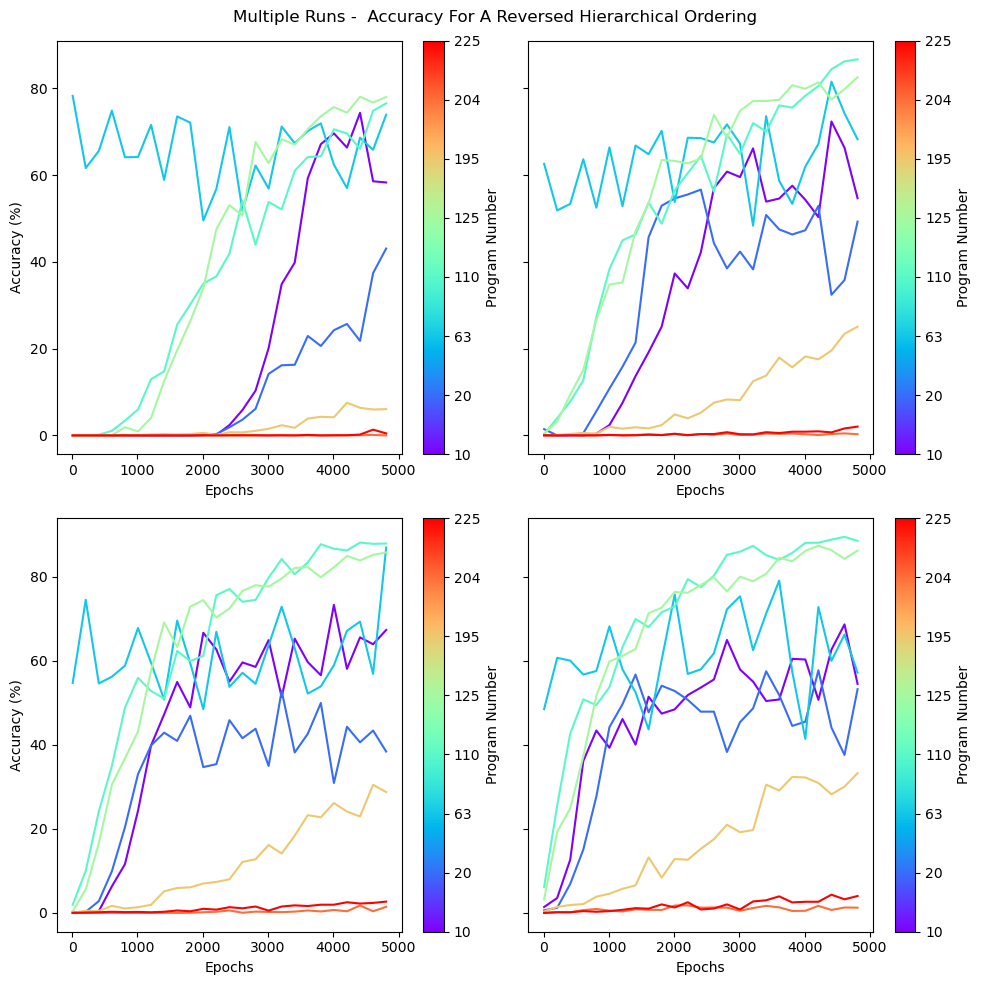

In [109]:
# For adjusting plots made as above

#rel_list = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225]
rel_list = [10, 20, 63, 110, 125, 195, 204, 225]
num_repeats = 4 # Must be even, sorry
moving_avg = 20
fig, axs = plt.subplots(2, int(num_repeats/2), figsize=(5*(int(num_repeats/2)),5*(int(num_repeats/2))), sharey='row')
for repeat_idx in range(num_repeats):
    #reset_weights(model)
    #[training_loss, accuracy_array] = main_train(data_size, programmes_prob_distribution, batch_size, timesteps, num_epochs)
    #training_loss_list.append(training_loss)
    #accuracy_array_list.append(accuracy_array)
    accuracy_array = accuracy_array_list[repeat_idx]
    accuracy_plot(axs[repeat_idx // (num_repeats//2), repeat_idx % (num_repeats//2)], moving_avg, num_epochs, rel_list, repeat_idx, accuracy_array)
    
plt.suptitle('Multiple Runs -  Accuracy For A Reversed Hierarchical Ordering')
plt.tight_layout()
plt.show()  

C:\Users\plogo\AppData\Local\Temp\ipykernel_17604\1524819585.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose different colormaps
  0%|          | 0/12 [00:00<?, ?it/s]

50


ValueError: x and y must have same first dimension, but have shapes (5000,) and (50,)

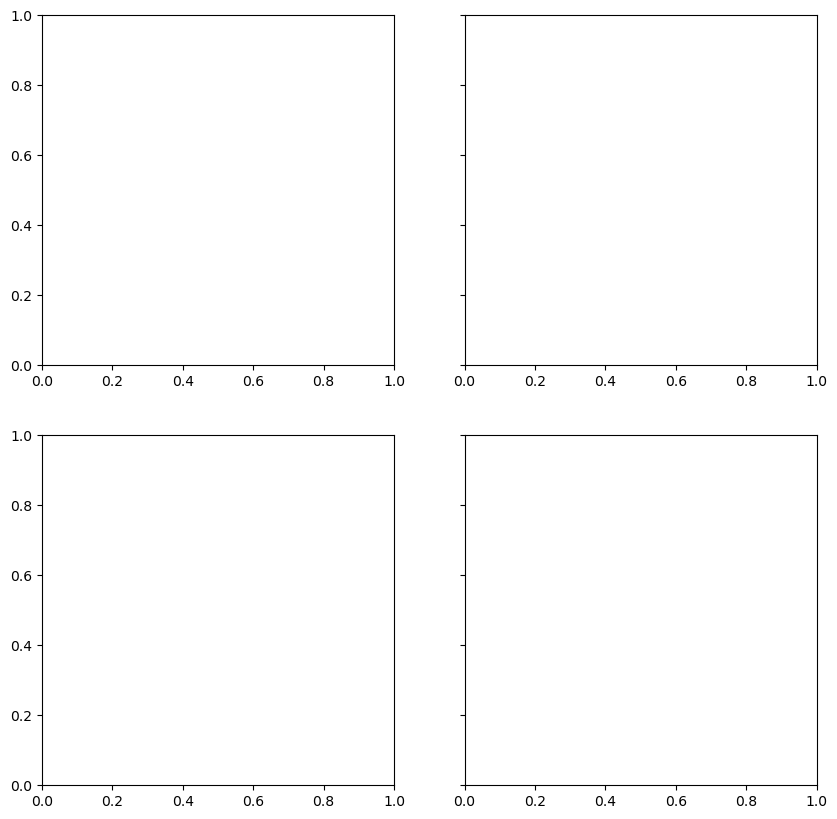

In [100]:
# Plot fewer points for readability. NONE FUNCTIONAL

def few_plot(ax, point_dist, num_epochs, rel_list, repeat_idx, accuracy_array):
        
    epochs = np.arange(1, num_epochs - num_epochs%point_dist + 1,1)

    rel_array = np.array(rel_list)
    uncorr_array = rel_array
    lines_plotted = rel_array

    rel_epochs = [x for x, index in enumerate(epochs) if index%point_dist==0]
    #print(rel_epochs)
    # Create an axis object for the line plot
    cmap = cm.get_cmap('rainbow')  # You can choose different colormaps

    for i in tqdm(lines_plotted):
        line = accuracy_array[:num_epochs:point_dist,i]
        print(len(line))
        # Hacky solution
        rel_epochs = rel_epochs[:len(line)]
        rel_epochs = np.repeat(rel_epochs, int(num_epochs/len(line)))
        color = cmap(np.where(lines_plotted == i)[0][0] / (len(lines_plotted) - 1))
        ax.plot(rel_epochs, line, label='Programme: ' + str(i), color=color)

    cbar = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(0, len(lines_plotted) - 1), cmap=cmap), ax=ax)
    cbar.set_label('Program Number')

    num_ticks = len(lines_plotted)  # Number of desired ticks
    indices = np.linspace(0, len(lines_plotted) - 1, num_ticks, dtype=int)
    tick_positions = indices
    tick_labels = lines_plotted[indices]

    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels(tick_labels)

    ax.set_ylabel('Accuracy (%)')

#accuracy_frequency = 10
rel_list = [0, 10, 20, 63, 64, 95, 96, 110, 125, 195, 204, 225]
num_repeats = 4 # Must be even, sorry
point_dist = 10
fig, axs = plt.subplots(2, int(num_repeats/2), figsize=(5*(int(num_repeats/2)),5*(int(num_repeats/2))), sharey='row')
for repeat_idx in range(num_repeats):
    accuracy_array = accuracy_array_list[repeat_idx]
    ax = axs[repeat_idx // (num_repeats//2), repeat_idx % (num_repeats//2)]
    #few_plot(ax, point_dist, num_epochs, rel_list, repeat_idx, accuracy_array[::point_dist])
    few_plot(ax, point_dist, num_epochs, rel_list, repeat_idx, accuracy_array)
    
plt.suptitle('Multiple Runs -  Accuracy For A Hierarchical Ordering')
plt.tight_layout()
plt.show()  

In [67]:
# Save the trained model

# Save the model
torch.save(model.state_dict(), 'model_hierarhical_negative_corrected.pth')

In [73]:
list_now = np.arange(1, 101, 1)
print(list_now[::10])

[ 1 11 21 31 41 51 61 71 81 91]
